In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [207]:
path = Path.cwd()/'datasets'

In [208]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    path,
    target_size = (80, 80),
    class_mode = 'categorical',
    subset = 'training',
    seed = 42
)

validataion_generator = train_datagen.flow_from_directory(
    path,
    target_size = (80, 80),
    class_mode = 'categorical',
    subset = 'validation',
    seed = 42
)

Found 368 images belonging to 3 classes.
Found 154 images belonging to 3 classes.


In [215]:
model = tf.keras.models.Sequential([
              layers.Conv2D(16, (3, 3), activation='relu', input_shape=(80, 80, 3), padding='same'),
              layers.MaxPooling2D(2,2), 

              layers.Conv2D(32, (3, 3), activation='relu'),
              layers.Conv2D(64, (3, 3), activation='relu'),
              layers.MaxPooling2D(3,3),
              layers.Conv2D(128,3, activation='relu',), 
              layers.MaxPooling2D(2,2),

              layers.Flatten(),
              layers.Dense(512, activation='relu'),
              layers.Dropout(0.4),
              layers.Dense(128, activation='relu'),
              layers.Dropout(0.2),
              layers.Dense(64, activation=tf.nn.leaky_relu),
              layers.Dropout(.4),
              layers.Dense(3, activation='softmax')
])

model.compile(loss=tf.losses.categorical_crossentropy, metrics=['acc'], optimizer='sgd')
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 80, 80, 16)        448       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 40, 40, 16)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 38, 38, 32)        4640      
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 5, 5, 128)       

In [216]:
hist = model.fit(train_generator, validation_data=validataion_generator,  epochs=1000)

Epoch 1/1000
12/12 [==============================] - 2s 145ms/step - loss: 1.0971 - acc: 0.3413 - val_loss: 1.0929 - val_acc: 0.3442
Epoch 2/1000
12/12 [==============================] - 1s 125ms/step - loss: 1.0933 - acc: 0.3983 - val_loss: 1.0907 - val_acc: 0.3312
Epoch 3/1000
12/12 [==============================] - 1s 126ms/step - loss: 1.0910 - acc: 0.3581 - val_loss: 1.0886 - val_acc: 0.3312
Epoch 4/1000
12/12 [==============================] - 1s 125ms/step - loss: 1.0916 - acc: 0.3268 - val_loss: 1.0865 - val_acc: 0.3312
Epoch 5/1000
12/12 [==============================] - 1s 127ms/step - loss: 1.0928 - acc: 0.3701 - val_loss: 1.0838 - val_acc: 0.3312
Epoch 6/1000
12/12 [==============================] - 1s 125ms/step - loss: 1.0889 - acc: 0.3933 - val_loss: 1.0810 - val_acc: 0.3377
Epoch 7/1000
12/12 [==============================] - 1s 125ms/step - loss: 1.0960 - acc: 0.3481 - val_loss: 1.0771 - val_acc: 0.3312
Epoch 8/1000
12/12 [==============================] - 1s 124ms

In [218]:
epochs = range(1000)

train_loss = hist.history['loss']
accuracy = hist.history['acc']
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']


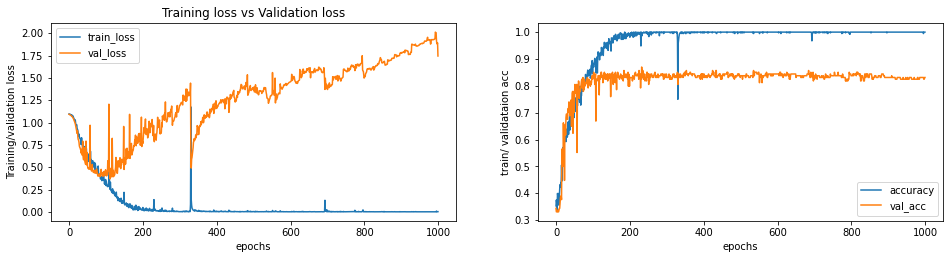

In [229]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)

plt.plot(epochs, train_loss)
plt.plot(epochs, val_loss)
plt.title("Training loss vs Validation loss")
plt.xlabel("epochs")
plt.ylabel("Training/validation loss")
plt.legend(['train_loss', 'val_loss'])


plt.subplot(2, 2, 2)

plt.plot(epochs, accuracy)
plt.plot(epochs, val_acc)
plt.xlabel("epochs")
plt.ylabel("train/ validataion acc")
plt.legend(['accuracy', 'val_acc'])


In [167]:
from google.colab import files

In [230]:
upload_data = files.upload()

Saving 5120.jpg to 5120 (2).jpg
Saving 190606200517-formosan-black-bear.jpg to 190606200517-formosan-black-bear (1).jpg
Saving a.jpg to a (2).jpg


In [232]:
from keras.preprocessing import image
import numpy as np

In [234]:
for i in upload_data.keys():
  path = '/content/'+i
  img = image.load_img(path, target_size=(80, 80))
  x = image.img_to_array(img)
 
  x = np.expand_dims(x, axis=0)
  print(model.predict(x, batch_size=10))

[[0. 0. 1.]]
[[0. 0. 1.]]
[[0. 0. 1.]]
